### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set()

# t-Distributed Stochastic Neighbor Embedding 

- Used for data reduction
- Unsupervised Non Linear Technique

### Data Reduction :
A process of reducing the higher dimension data to lower dimensional data to make the model less expensive is called data reduction.

### Loading Data

In [4]:
data = pd.read_csv(r'C:\Users\vamsi\Desktop\ML\Data Dimensionality\bank_note_data.csv')
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
data.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# 0 - Fake
# 1 - Genuine

data['Class'].unique()

array([0, 1], dtype=int64)

In [8]:
data['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [12]:
features = data.columns[:-1]
targets = data.columns[-1]

In [16]:
features

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [17]:
targets

'Class'

# Data Standardization

In [23]:
sc = StandardScaler()

data_norm = data.copy()
data_norm[features] = sc.fit_transform(data[features])
data_norm.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


# <font color="green"> TSNE </font>

In [24]:
tsne = TSNE(learning_rate=500,n_components=2)

x_tsne = tsne.fit_transform(data_norm[features])
y_tsne = data[targets]

In [25]:
x_tsne

array([[-27.237383,  29.306349],
       [-25.27884 ,  32.84963 ],
       [  3.876689, -57.66353 ],
       ...,
       [ 52.99383 ,  20.727926],
       [ 47.00991 ,  14.900087],
       [ 20.33418 , -10.116031]], dtype=float32)

In [26]:
y_tsne

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

### VIsualization

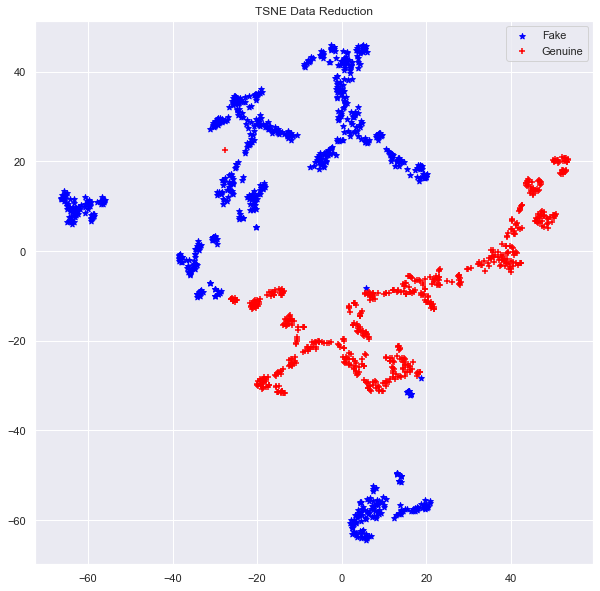

In [29]:
#TSNE Visualization
plt.figure(figsize=(10,10))
for i in range(0,x_tsne.shape[0]):
    if y_tsne[i]==0:
        c1 = plt.scatter(x_tsne[i][0],x_tsne[i][1],c='blue',marker='*')
    elif y_tsne[i]==1:
        c2 = plt.scatter(x_tsne[i][0],x_tsne[i][1],c='red',marker='+')
plt.legend([c1,c2],['Fake','Genuine','Cluster3','Cluster4','Cluster5','Cluster6'])
plt.title('TSNE Data Reduction')       
plt.show()